# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Indest Data

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.columns.T

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.duplicated().sum()

0

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
corr=df.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


<AxesSubplot:>

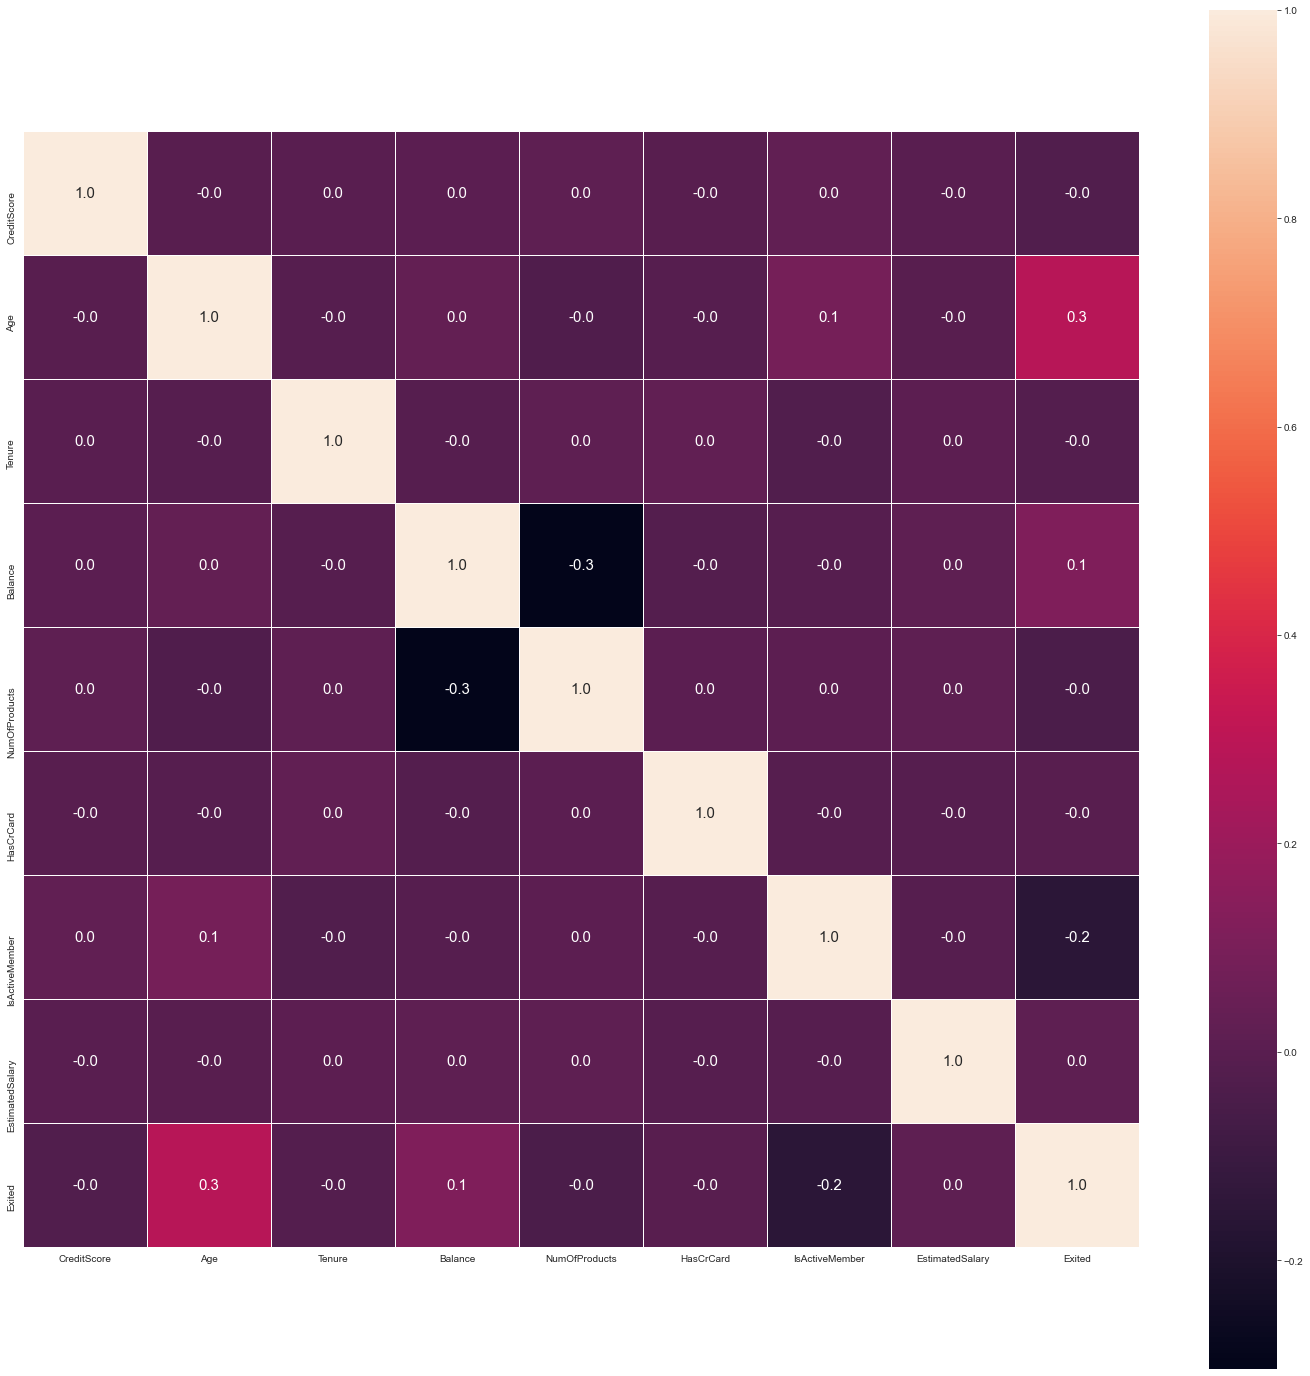

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15},linewidths=1)

In [12]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

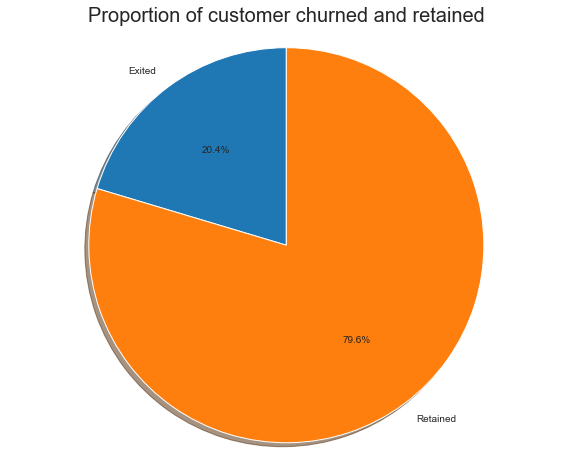

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [14]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

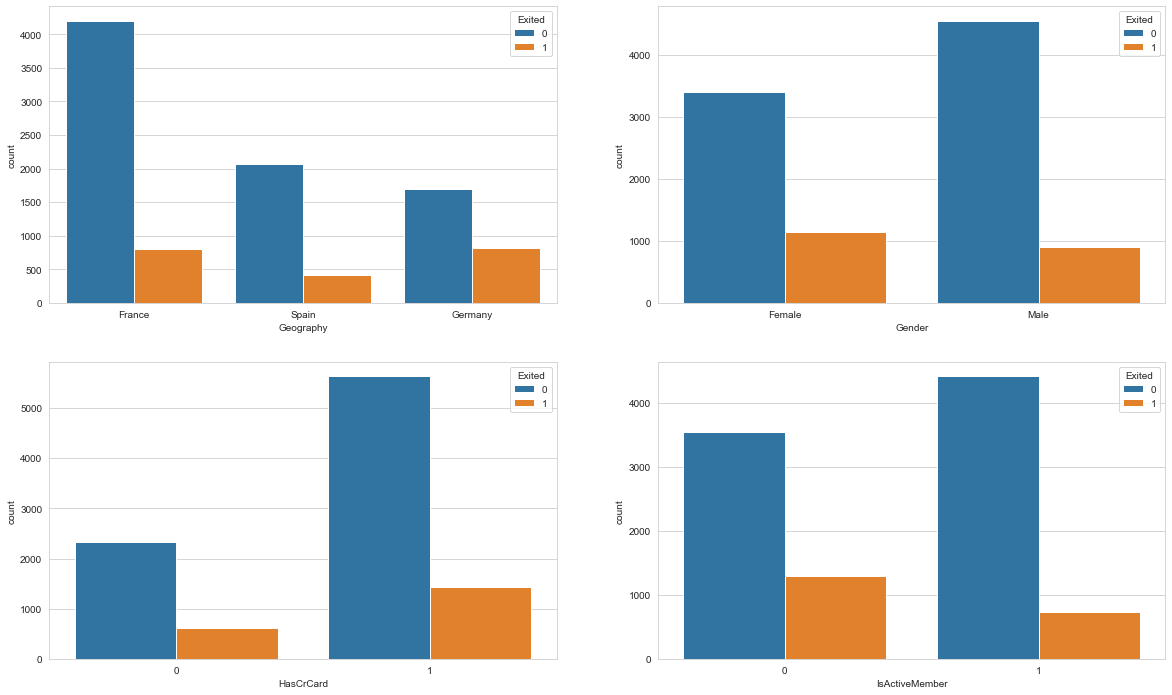

In [15]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [16]:
num_cols = ['CreditScore','Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [17]:
cat_cols =(['Geography', 'Gender'])

In [18]:
df_select = df.loc[:,['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]


In [19]:
df_select_encod = pd.get_dummies(df)
df_select_encod

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,1,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,0,1,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,0,1


In [20]:
# shift column 'exited' to first position
first_column = df_select_encod.pop('Exited')

In [21]:
# insert column using insert(position,column_name,
# first_column) function
df_select_encod.insert(0, 'Exited', first_column)

In [22]:
df_select_encod

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,0,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,1,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,0,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,0,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,771,39,5,0.000,2,1,0,96270.640,1,0,0,0,1
9996,0,516,35,10,57369.610,1,1,1,101699.770,1,0,0,0,1
9997,1,709,36,7,0.000,1,0,1,42085.580,1,0,0,1,0
9998,1,772,42,3,75075.310,2,1,0,92888.520,0,1,0,0,1


In [23]:
#We specify continuous and discrete variables for scaling 
continuous_var = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
discrete_var = ['HasCrCard','IsActiveMember',"Geography", "Gender"]

In [24]:
minvar = df_select_encod[continuous_var].min().copy()
maxvar = df_select_encod[continuous_var].max().copy()
df_select_encod[continuous_var] = (df_select_encod[continuous_var]-minvar)/(maxvar-minvar)
df_select_encod.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0.538,0.324,0.200,0.000,0.000,1,1,0.507,1,0,0,1,0
1,0,0.516,0.311,0.100,0.334,0.000,0,1,0.563,0,0,1,1,0
2,1,0.304,0.324,0.800,0.636,0.667,1,0,0.570,1,0,0,1,0
3,0,0.698,0.284,0.100,0.000,0.333,0,0,0.469,1,0,0,1,0
4,0,1.000,0.338,0.200,0.500,0.000,1,1,0.395,0,0,1,1,0


In [25]:
df_select_encod[continuous_var] 

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.538,0.324,0.200,0.000,0.000,0.507
1,0.516,0.311,0.100,0.334,0.000,0.563
2,0.304,0.324,0.800,0.636,0.667,0.570
3,0.698,0.284,0.100,0.000,0.333,0.469
4,1.000,0.338,0.200,0.500,0.000,0.395
...,...,...,...,...,...,...
9995,0.842,0.284,0.500,0.000,0.333,0.481
9996,0.332,0.230,1.000,0.229,0.000,0.508
9997,0.718,0.243,0.700,0.000,0.000,0.210
9998,0.844,0.324,0.300,0.299,0.333,0.464


## Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics

In [27]:
X = df_select_encod.drop(['Exited'],axis = 1)
y = df_select_encod['Exited']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
y_train.value_counts(normalize=True)

0   0.796
1   0.204
Name: Exited, dtype: float64

In [32]:
y_test.value_counts(normalize=True)

0   0.796
1   0.204
Name: Exited, dtype: float64

In [38]:
X_train.shape

(9000, 13)

## Modelling & Model Performance

### Import related libraries

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [39]:
model = Sequential()
model.add(Dense(units = 10, activation = "relu"))     # input_dim = X_train.shape[1] or input_shape = X_train.shape
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 5, activation = "relu"))
model.add(Dense(units = 1))

In [40]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
282/282 [==============================] - 1s 1ms/step - loss: 0.5803 - accuracy: 0.7963
Epoch 2/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7978
Epoch 3/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7988
Epoch 4/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8044
Epoch 5/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8111
Epoch 6/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8142
Epoch 7/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8198
Epoch 8/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8216
Epoch 9/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8243
Epoch 10/250
282/282 [==============================] - 1s 2ms/step - loss: 0.4253 - accura

282/282 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8620
Epoch 160/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.8636
Epoch 161/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.8616
Epoch 162/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.8630
Epoch 163/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.8640
Epoch 164/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.8632
Epoch 165/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8641
Epoch 166/250
282/282 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8640
Epoch 167/250
282/282 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8654
Epoch 168/250
282/282 [==============================] - 0s 1ms/step - loss: 0.5252 - a

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy
0,0.580,0.796
1,0.468,0.798
2,0.453,0.799
3,0.442,0.804
4,0.439,0.811


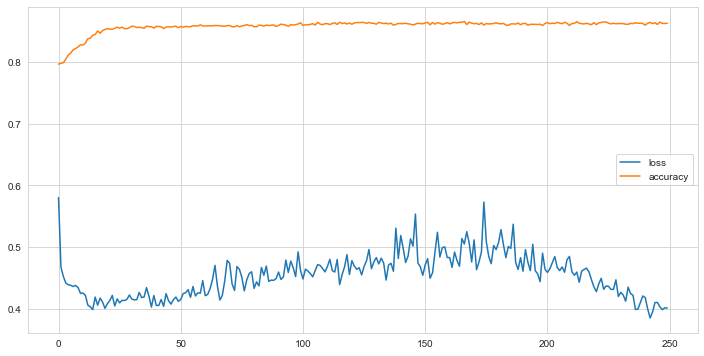

In [44]:
loss_df.plot();

In [45]:
model.evaluate(X_test, y_test, verbose=0)

[0.39490795135498047, 0.8619999885559082]

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.39490795135498047
accuracy :  0.8619999885559082


In [47]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  26]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.83      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
model = Sequential()
model.add(Dense(units = 10, activation = "relu"))     # input_dim = X_train.shape[1] or input_shape = X_train.shape
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 5, activation = "relu"))
model.add(Dense(units = 1))

In [72]:
opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [73]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
282/282 [==============================] - 1s 2ms/step - loss: 1.3219 - accuracy: 0.7829
Epoch 2/250
282/282 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7963
Epoch 3/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7963
Epoch 4/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7966
Epoch 5/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8071
Epoch 6/250
282/282 [==============================] - 1s 2ms/step - loss: 0.4384 - accuracy: 0.8134
Epoch 7/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8227
Epoch 8/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8227
Epoch 9/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8259
Epoch 10/250
282/282 [==============================] - 0s 1ms/step - loss: 0.4384 - accura

282/282 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8412
Epoch 161/250
282/282 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8381
Epoch 162/250
282/282 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8383
Epoch 163/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8290
Epoch 164/250
282/282 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8347
Epoch 165/250
282/282 [==============================] - 1s 2ms/step - loss: 0.3961 - accuracy: 0.8379
Epoch 166/250
282/282 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8318
Epoch 167/250
282/282 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8386
Epoch 168/250
282/282 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8450
Epoch 169/250
282/282 [==============================] - 1s 2ms/step - loss: 0.3890 - a

In [55]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  26]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       796
           1       0.77      0.42      0.54       204

    accuracy                           0.86      1000
   macro avg       0.82      0.69      0.73      1000
weighted avg       0.85      0.86      0.84      1000



# Drop Out Layer

In [77]:
from tensorflow.keras.layers import Dropout


In [78]:
model = Sequential()

model.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))   
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [79]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 250, verbose = 1)

Epoch 1/250
240/240 [==============================] - 1s 3ms/step - loss: 0.8678 - accuracy: 0.7946 - val_loss: 0.4983 - val_accuracy: 0.7970
Epoch 2/250
240/240 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7963 - val_loss: 0.4943 - val_accuracy: 0.7970
Epoch 3/250
240/240 [==============================] - 1s 2ms/step - loss: 0.5057 - accuracy: 0.7953 - val_loss: 0.4884 - val_accuracy: 0.7970
Epoch 4/250
240/240 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.7966 - val_loss: 0.4880 - val_accuracy: 0.7970
Epoch 5/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7974 - val_loss: 0.4856 - val_accuracy: 0.7970
Epoch 6/250
240/240 [==============================] - 1s 2ms/step - loss: 0.4912 - accuracy: 0.7969 - val_loss: 0.4789 - val_accuracy: 0.7970
Epoch 7/250
240/240 [==============================] - 1s 2ms/step - loss: 0.4897 - accuracy: 0.7982 - val_loss: 0.4748 - val_accuracy: 0.7970

Epoch 58/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8264 - val_loss: 0.3588 - val_accuracy: 0.8348
Epoch 59/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8273 - val_loss: 0.3511 - val_accuracy: 0.8474
Epoch 60/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8311 - val_loss: 0.3479 - val_accuracy: 0.8570
Epoch 61/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8324 - val_loss: 0.3687 - val_accuracy: 0.8400
Epoch 62/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8298 - val_loss: 0.3443 - val_accuracy: 0.8593
Epoch 63/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8280 - val_loss: 0.3520 - val_accuracy: 0.8496
Epoch 64/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8295 - val_loss: 0.3483 - val_accuracy:

Epoch 115/250
240/240 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8348 - val_loss: 0.3624 - val_accuracy: 0.8481
Epoch 116/250
240/240 [==============================] - 1s 2ms/step - loss: 0.4120 - accuracy: 0.8371 - val_loss: 0.3461 - val_accuracy: 0.8659
Epoch 117/250
240/240 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8392 - val_loss: 0.3477 - val_accuracy: 0.8659
Epoch 118/250
240/240 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8397 - val_loss: 0.3475 - val_accuracy: 0.8704
Epoch 119/250
240/240 [==============================] - 1s 2ms/step - loss: 0.4198 - accuracy: 0.8324 - val_loss: 0.4047 - val_accuracy: 0.8052
Epoch 120/250
240/240 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8207 - val_loss: 0.3638 - val_accuracy: 0.8289
Epoch 121/250
240/240 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8318 - val_loss: 0.3407 - val_ac

240/240 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8383 - val_loss: 0.3336 - val_accuracy: 0.8667
Epoch 228/250
240/240 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8426 - val_loss: 0.3413 - val_accuracy: 0.8733
Epoch 229/250
240/240 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8393 - val_loss: 0.3356 - val_accuracy: 0.8733
Epoch 230/250
240/240 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8375 - val_loss: 0.3322 - val_accuracy: 0.8711
Epoch 231/250
240/240 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8362 - val_loss: 0.3516 - val_accuracy: 0.8711
Epoch 232/250
240/240 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8369 - val_loss: 0.3725 - val_accuracy: 0.8326
Epoch 233/250
240/240 [==============================] - 1s 3ms/step - loss: 0.4064 - accuracy: 0.8311 - val_loss: 0.3612 - val_accuracy: 0.8600

<AxesSubplot:>

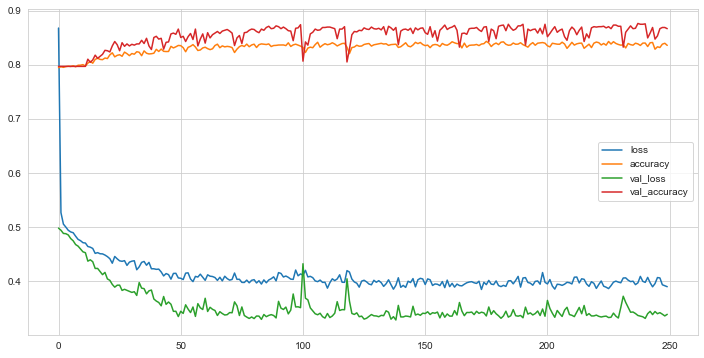

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[788   8]
 [146  58]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       796
           1       0.88      0.28      0.43       204

    accuracy                           0.85      1000
   macro avg       0.86      0.64      0.67      1000
weighted avg       0.85      0.85      0.81      1000



## GridSearchCV

In [82]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [84]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
